Tên: Phùng Nghĩa Phúc

MSV: 20127284

1. Import Thư viện

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import layers
from keras import models


2. MNIST Dataset

In [ ]:
# load dataset
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()



# đếm số lượng train labels duy nhất 
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# dếm số lượng test labels duy nhất
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

4422102/4422102 [==============================] - 0s 0us/step
Train labels:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}

Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


3. Data visualization

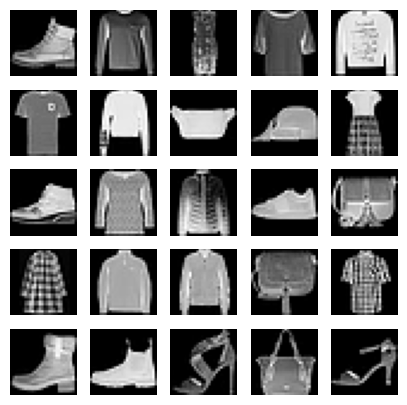

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

4. Thiet ke mang neural network 3 lop: 1 lop input, 1 lop an, va mot lop output

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

614656

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# lớp input với size 784, lớp ẩn với 512 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 5ms/step - loss: 0.5094 - accuracy: 0.8241 - val_loss: 0.4153 - val_accuracy: 0.8540
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3823 - accuracy: 0.8627 - val_loss: 0.3582 - val_accuracy: 0.8658
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8790 - val_loss: 0.3417 - val_accuracy: 0.8728
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3147 - accuracy: 0.8846 - val_loss: 0.3308 - val_accuracy: 0.8775
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2944 - accuracy: 0.8918 - val_loss: 0.3225 - val_accuracy: 0.8827
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2731 - accuracy: 0.8986 - val_loss: 0.3275 - val_accuracy: 0.8782
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.9019 - val_loss: 0.3211 - val_accuracy: 0.8887
Epoch 

5. Thuc nghiem so luong node an voi: 100, 200 va 500 tren cac tap dataset

5.1 so luong node an la: 100

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

num_nodes = 100

# lớp input với size 784, lớp ẩn với 100 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(num_nodes, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 0.5829 - accuracy: 0.8002 - val_loss: 0.4453 - val_accuracy: 0.8443
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 0.4271 - accuracy: 0.8495 - val_loss: 0.4254 - val_accuracy: 0.8492
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3852 - accuracy: 0.8637 - val_loss: 0.4152 - val_accuracy: 0.8430
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3569 - accuracy: 0.8721 - val_loss: 0.3681 - val_accuracy: 0.8650
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8774 - val_loss: 0.3535 - val_accuracy: 0.8693
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8835 - val_loss: 0.3422 - val_accuracy: 0.8738
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8868 - val_loss: 0.3486 - val_accuracy: 0.8750
Epoch 

5.2 So luong node an la: 200

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

num_nodes = 200

# lớp input với size 784, lớp ẩn với 100 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(num_nodes, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.5515 - accuracy: 0.8096 - val_loss: 0.4281 - val_accuracy: 0.8478
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8587 - val_loss: 0.3785 - val_accuracy: 0.8655
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3585 - accuracy: 0.8730 - val_loss: 0.3552 - val_accuracy: 0.8745
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3344 - accuracy: 0.8790 - val_loss: 0.3457 - val_accuracy: 0.8792
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.8858 - val_loss: 0.3381 - val_accuracy: 0.8768
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8920 - val_loss: 0.3327 - val_accuracy: 0.8802
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2799 - accuracy: 0.8985 - val_loss: 0.3141 - val_accuracy: 0.8828
Epoch 

5.3. So luong node an la: 500

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

num_nodes = 500

# lớp input với size 784, lớp ẩn với 100 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(num_nodes, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.5199 - accuracy: 0.8194 - val_loss: 0.4664 - val_accuracy: 0.8257
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3768 - accuracy: 0.8657 - val_loss: 0.3634 - val_accuracy: 0.8745
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8783 - val_loss: 0.3319 - val_accuracy: 0.8800
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3110 - accuracy: 0.8865 - val_loss: 0.3369 - val_accuracy: 0.8778
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2902 - accuracy: 0.8931 - val_loss: 0.3613 - val_accuracy: 0.8677
Epoch 6/20
422/422 [==============================] - 1s 4ms/step - loss: 0.2768 - accuracy: 0.8989 - val_loss: 0.3359 - val_accuracy: 0.8757
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.9039 - val_loss: 0.3101 - val_accuracy: 0.8892
Epoch 

6. Tăng số lượng lớp ảnh lên 2 và 3

6.1 Tăng số lượng lớp ảnh lên 2

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))


# lớp input với size 784, lớp ẩn 1 với 512 units, lớp ẩn 2 với 256 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.4943 - accuracy: 0.8236 - val_loss: 0.3713 - val_accuracy: 0.8645
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3574 - accuracy: 0.8686 - val_loss: 0.3728 - val_accuracy: 0.8605
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3219 - accuracy: 0.8816 - val_loss: 0.3621 - val_accuracy: 0.8735
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2952 - accuracy: 0.8905 - val_loss: 0.3296 - val_accuracy: 0.8793
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2754 - accuracy: 0.8981 - val_loss: 0.3270 - val_accuracy: 0.8848
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2598 - accuracy: 0.9031 - val_loss: 0.3725 - val_accuracy: 0.8557
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.2486 - accuracy: 0.9066 - val_loss: 0.3474 - val_accuracy: 0.8785
Epoch 

6.2 Tăng số lượng lớp ảnh lên 3

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# resize and normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))


# lớp input với size 784, lớp ẩn 1 với 512 units, lớp ẩn 2 với 256 units, lớp ẩn 2 với 128 units, lớp output với 10 units
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# đánh giá model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.5020 - accuracy: 0.8211 - val_loss: 0.4013 - val_accuracy: 0.8492
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3587 - accuracy: 0.8684 - val_loss: 0.3367 - val_accuracy: 0.8762
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3249 - accuracy: 0.8792 - val_loss: 0.3476 - val_accuracy: 0.8725
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2982 - accuracy: 0.8893 - val_loss: 0.3560 - val_accuracy: 0.8780
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2801 - accuracy: 0.8959 - val_loss: 0.3166 - val_accuracy: 0.8842
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2645 - accuracy: 0.9007 - val_loss: 0.3285 - val_accuracy: 0.8848
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.2509 - accuracy: 0.9054 - val_loss: 0.3208 - val_accuracy: 0.8877
Epoch 